In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from src.stats_utils import Distribution, WeibullDistribution, get_full_interval

mpl.rcParams.update({'font.size': 8})
mpl.rcParams['figure.dpi'] = 300


In [11]:
start_time = 0
end_time = 10000000
num_samples = 100000
mean = 100

dist_normal = Distribution(np.random.normal, (mean, 10))
dist_exponential = Distribution(np.random.exponential, (mean,))
dist_lognormal = Distribution(np.random.lognormal, (np.log(mean) - 0.5,)) # lognormal takes as input the mean of the underlying nomal distribution 
dist_weibull = WeibullDistribution(mean, shape=1.8)

dist_list = [dist_normal, dist_exponential, dist_lognormal]
name_list = ["Normal", "Exponential", "Lognormal"]


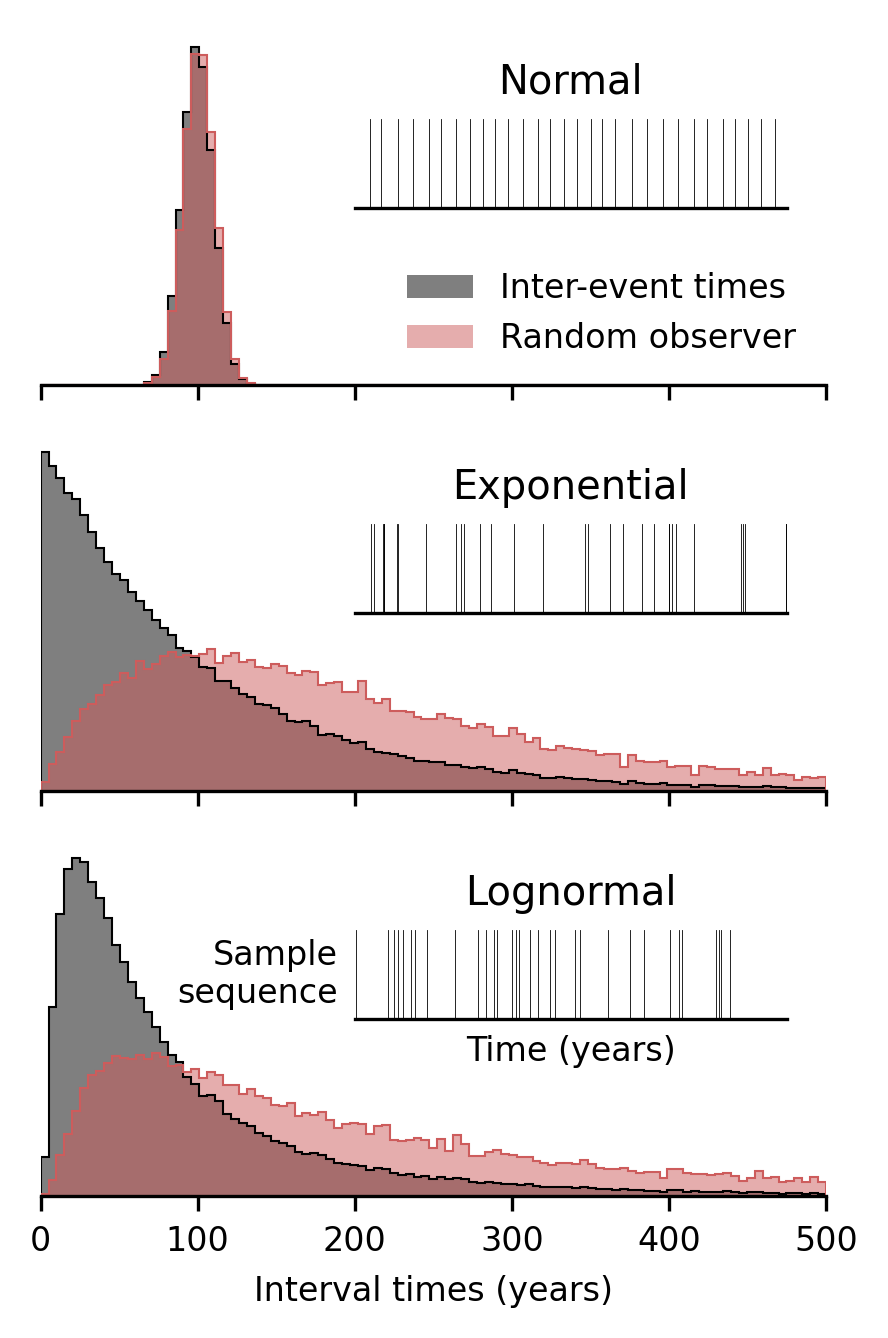

In [14]:
fig, ax = plt.subplots(len(dist_list), 1, sharex=True, figsize=(3, 4.5))

snip_time = 30*mean
bins = np.linspace(0, 5 * mean, 100)
hist_kwargs = {"bins": bins, "density": True}

for i, (dist, name) in enumerate(zip(dist_list, name_list)):

    t = np.array(dist.sample_interval(start_time, end_time))

    random_times = np.sort(
        np.random.uniform(start_time, end_time, size=num_samples)
    )

    # horribly inefficient but it works
    interval_times = np.array(
        [
            get_full_interval(tq, t) 
            for tq in random_times
        ]
    )

    ax[i].hist(np.diff(t), **hist_kwargs, color = 'k', alpha=0.5, label="Inter-event times")
    ax[i].hist(np.diff(t), **hist_kwargs, color = 'k', histtype='step', linewidth=0.5)
    ax[i].hist(interval_times, **hist_kwargs, color = 'indianred', alpha=0.5, label="Random observer")
    ax[i].hist(interval_times, **hist_kwargs, color = 'indianred', histtype='step', linewidth=0.5)
    
    # remove all top, left and right spines
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False) 
    ax[i].set_yticks([])   

    inset_ax = ax[i].inset_axes((0.4, 0.5, 0.55, 0.25))
    [inset_ax.axvline(t_i, color="k", lw=0.2) for t_i in t[t<snip_time]]
    inset_ax.set(
        xlim=(0, snip_time),
        yticks=[],
        xticks=[],
    )
    
    # remove all top, left and right spines
    inset_ax.spines['top'].set_visible(False)
    inset_ax.spines['left'].set_visible(False)
    inset_ax.spines['right'].set_visible(False)    

    
    inset_ax.set_title(name)

inset_ax.set(
    xlabel = "Time (years)",
)

inset_ax.set_ylabel("Sample\nsequence", rotation=0, ha='right', va='center')

ax[0].legend(loc="lower right", frameon=False)

ax[-1].set(
    xlabel="Interval times (years)",
    xlim=(0, 5 * mean),
    yticks=[],
)

plt.tight_layout()
plt.savefig("waiting_time_paradox.pdf", dpi=300)